In [1]:
import numpy as np
import pandas as pd

In [2]:
company = pd.read_csv('title_location_company_salary.csv')

In [3]:
# 1. DATA UNDERSTANDING

In [4]:
company

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.
...,...,...,...,...,...,...
1282,1282,Data Scientist,PayPal,"San Jose, CA",82000.0,Unknown
1283,1283,Software Engineer,NVIDIA,"Santa Clara, CA",160000.0,Sr.
1284,1284,Data Scientist,Afterpay Touch,"San Francisco, CA",130000.0,Staff
1285,1285,Director of Data Science,Anthem,"San Francisco, CA",200000.0,Unknown


In [5]:
#the first column need to be dropped

In [6]:
company.shape

(1287, 6)

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [8]:
company.describe()

,Unnamed: 0,Salary
count,1287.000000,1209.000000
mean,643.000000,150969.914806
std,371.669208,33377.154151
min,0.000000,0.000000
25%,321.500000,130000.000000
50%,643.000000,150000.000000
75%,964.500000,170000.000000
max,1286.000000,434000.000000


In [9]:
company.nunique()

Unnamed: 0    1287
Title           13
Company        527
Location        81
Salary          56
Levels           7
dtype: int64

In [10]:
# 2. DATA CLEANING AND PREPARATION

In [11]:
#2.1 Drop the unused column
company.drop(columns='Unnamed: 0',axis=1, inplace=True)
company.head()

,Title,Company,Location,Salary,Levels
0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [12]:
#2.2 Check and remove duplicated data 
company.duplicated().sum()

342

In [13]:
company.drop_duplicates(inplace=True)

In [14]:
company.duplicated().sum()

0

In [15]:
company

,Title,Company,Location,Salary,Levels
0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.
...,...,...,...,...,...
1281,Data Scientist,Atlassian,"Mountain View, CA",180000.0,Principal
1282,Data Scientist,PayPal,"San Jose, CA",82000.0,Unknown
1283,Software Engineer,NVIDIA,"Santa Clara, CA",160000.0,Sr.
1284,Data Scientist,Afterpay Touch,"San Francisco, CA",130000.0,Staff


In [18]:
#2.3 Check missing data
company.isnull().sum()

Title         0
Company       2
Location    146
Salary       61
Levels        0
dtype: int64

In [19]:
#The title and company column should have a value. Remove rows where company column is null
company.dropna(subset=['Company'], inplace=True)

In [20]:
company.isnull().sum()

Title         0
Company       0
Location    144
Salary       61
Levels        0
dtype: int64

In [ ]:
#3 RELATIONSHIP ANALYSIS

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Salary'}, xlabel='[Title]'>

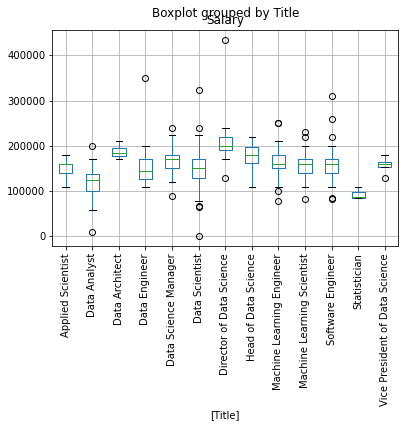

In [35]:
company.boxplot(column=['Salary'], by=['Title'], rot=90)

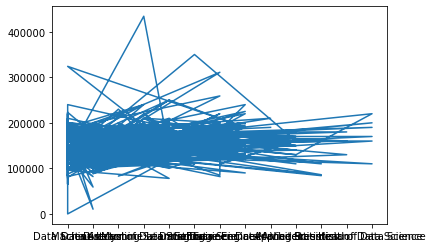

<Figure size 6480x720 with 0 Axes>

In [27]:
#Relationship between title and salary
x = company['Title']
y = company['Salary']
plt.plot(x,y)
plt.figure(figsize=(90,10))
plt.show()